# 2016년 서울시 부동산 데이터 기술통계

## import

In [4]:
# 모듈 import
import math
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Polygon
from shapely.geometry import Point

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

## 데이터 로드

In [94]:
seoul = pd.read_csv('data/Real estate/Seoul_2016.csv')
seoul

,HSMP_CD,PNU,PRC_AVRG1,RENT_AVRG1,PY_AVRG1,HOUSE_CNT,BLDG_CNT,COMPANY_DU,HIT_TYPE,FLOOR,...,D29,D30,D31,D32,D33,D34,D35,D36,SRC_X,SRC_Y
0,3,1114013600100110067,24500,16250,17,119,1,0,0,10,...,277.368355,2754.397747,259.986334,0,0,433.746776,164.040360,628.663284,955923,1951364
1,6,1114016200108400000,44083,33733,37,942,10,0,0,15,...,425.549726,3390.837845,6.067047,0,0,1240.434599,334.770952,253.875879,957746,1951281
2,12,1111017400107020000,34583,27166,31,585,5,0,0,14,...,643.005466,3098.323149,182.975832,0,0,276.328946,118.715551,257.318543,957077,1953551
3,13,1111017400107030000,33630,26440,32,919,7,0,0,15,...,732.130993,3287.063571,329.922737,0,0,278.300043,233.697794,174.982519,956888,1953557
4,16,1141010800101000000,47725,37700,35,895,8,0,0,18,...,325.475956,2035.388101,270.152046,0,0,243.158896,454.140128,410.321010,952173,1952437
5,17,1141010900102000000,50850,39860,33,1300,12,0,1,23,...,282.347577,2280.350579,26.036675,0,0,166.677825,373.790309,483.662276,952042,1952644
6,22,1141011100104540000,30300,24000,33,704,6,0,0,18,...,391.642962,4784.960421,615.994375,0,0,311.950235,370.055220,283.658914,951659,1955222
7,23,1141011100101040006,22416,13083,24,113,3,0,1,6,...,120.107173,3832.257621,145.887626,0,0,291.766367,520.037701,855.346083,951375,1954052
8,24,1141011100104600001,42833,35566,33,946,11,0,1,18,...,232.835839,3834.316198,153.239639,0,0,286.842088,639.971583,815.047095,951523,1954133
9,25,1141011100104530000,40500,34500,36,862,14,0,0,18,...,144.556245,3471.954862,249.903444,0,0,637.731924,265.351566,1061.391732,951599,1953764


In [11]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 0 to 2133
Data columns (total 53 columns):
HSMP_CD       2134 non-null int64
PNU           2134 non-null int64
PRC_AVRG1     2134 non-null int64
RENT_AVRG1    2134 non-null int64
PY_AVRG1      2134 non-null int64
HOUSE_CNT     2134 non-null int64
BLDG_CNT      2134 non-null int64
COMPANY_DU    2134 non-null int64
HIT_TYPE      2134 non-null int64
FLOOR         2134 non-null int64
BLD_DATE      2134 non-null int64
BLD_DATE2     2134 non-null int64
EDU           2134 non-null int64
RENT_O        2134 non-null int64
PRC_O         2134 non-null int64
D01           2134 non-null float64
D02           2134 non-null float64
D03           2134 non-null float64
D04           2134 non-null float64
D05           2134 non-null float64
D06           2134 non-null float64
D07           2134 non-null float64
D08           2134 non-null float64
D09           2134 non-null float64
D10           2134 non-null float64
D11           2134 non-

In [27]:
seoul[seoul['PRC_AVRG1']== seoul['PRC_AVRG1'].max()]

,HSMP_CD,PNU,PRC_AVRG1,RENT_AVRG1,PY_AVRG1,HOUSE_CNT,BLDG_CNT,COMPANY_DU,HIT_TYPE,FLOOR,...,D29,D30,D31,D32,D33,D34,D35,D36,SRC_X,SRC_Y
1280,7364,1168011000104560000,267375,104825,61,560,7,0,0,14,...,1297.793515,5786.483596,199.60836,0,0,667.400483,217.224479,278.108602,958460,1947954


In [29]:
seoul.tail()

,HSMP_CD,PNU,PRC_AVRG1,RENT_AVRG1,PY_AVRG1,HOUSE_CNT,BLDG_CNT,COMPANY_DU,HIT_TYPE,FLOOR,...,D29,D30,D31,D32,D33,D34,D35,D36,SRC_X,SRC_Y
2129,303381,1138010300106430000,50642,38857,30,882,15,1,1,19,...,307.224902,7903.101057,144.230905,0,0,1267.154505,152.463955,780.542978,949397,1957610
2130,303386,1138010700107610000,48187,30612,36,748,10,1,1,15,...,500.560962,5545.732366,369.238065,0,0,713.784974,198.865098,345.705771,949147,1954442
2131,304442,1153010600103420000,41821,33714,33,339,6,0,1,20,...,174.677319,4484.097769,239.480809,0,0,1026.731051,272.822851,532.132557,943342,1945230
2132,305758,1165010100107700001,64162,36375,29,419,3,0,1,12,...,40.247590,4352.223395,219.476140,0,0,868.335798,336.867032,635.012711,954602,1944026
2133,305759,1165010100107570003,107300,66700,67,216,5,0,1,12,...,77.070480,4087.496643,112.743140,0,0,577.427402,275.419821,837.928496,954597,1944321


In [35]:
seoul[['BLD_DATE']].min()

BLD_DATE    30
dtype: int64

Text(0, 0.5, 'probability')

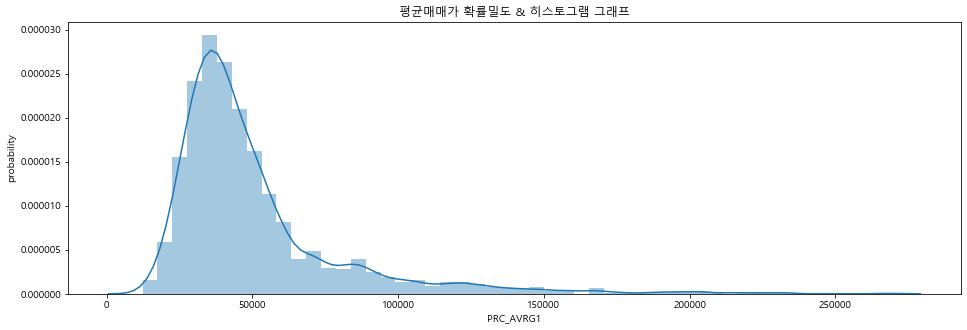

In [39]:
plt.figure(figsize=(16,5))
plt.title('평균매매가 확률밀도 & 히스토그램 그래프')
sns.distplot(seoul['PRC_AVRG1'], kde=True)
#plt.xlim(0,20000)
plt.ylabel('probability')

Text(0, 0.5, '매매가')

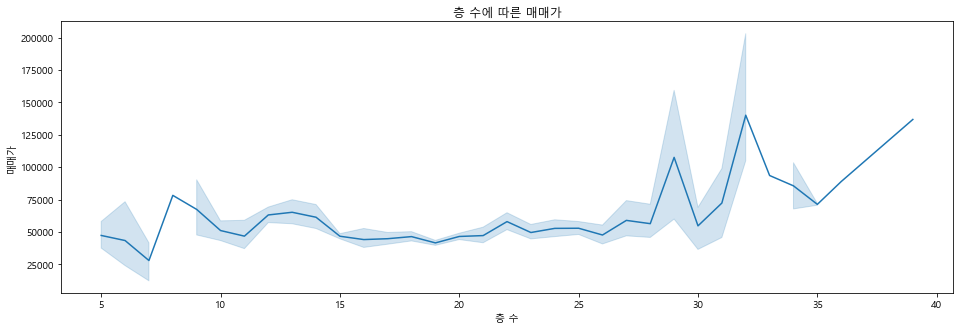

In [91]:
plt.figure(figsize=(16,5))
plt.title('층 수에 따른 매매가')
sns.lineplot(x='FLOOR',y='PRC_AVRG1',data=seoul)
plt.xlabel('층 수')
plt.ylabel('매매가')

### 상관관계

In [89]:
corr = seoul[['PRC_AVRG1','RENT_AVRG1','BLDG_CNT','BLD_DATE','BLD_DATE2','COMPANY_DU','EDU','D18','D16','D23','D34','D29']].corr()
corr

,PRC_AVRG1,RENT_AVRG1,BLDG_CNT,BLD_DATE,BLD_DATE2,COMPANY_DU,EDU,D18,D16,D23,D34,D29
PRC_AVRG1,1.000000,0.904105,0.194467,0.159023,0.236459,0.171139,0.407353,-0.182856,0.100823,0.236107,-0.170817,0.183683
RENT_AVRG1,0.904105,1.000000,0.155828,-0.102354,-0.042793,0.210916,0.369687,-0.200019,0.081923,0.125395,-0.185789,0.128878
BLDG_CNT,0.194467,0.155828,1.000000,0.031900,0.068960,0.034891,0.065682,0.022447,0.126722,0.009651,0.080180,0.181204
BLD_DATE,0.159023,-0.102354,0.031900,1.000000,0.969915,-0.148594,0.221287,-0.090672,-0.002362,0.128923,0.007486,0.074447
BLD_DATE2,0.236459,-0.042793,0.068960,0.969915,1.000000,-0.103494,0.207021,-0.084649,0.006068,0.151916,-0.003513,0.095519
COMPANY_DU,0.171139,0.210916,0.034891,-0.148594,-0.103494,1.000000,0.029256,-0.034829,0.035182,0.012736,-0.038429,-0.012084
EDU,0.407353,0.369687,0.065682,0.221287,0.207021,0.029256,1.000000,-0.084151,0.050288,0.085478,0.022997,0.257097
D18,-0.182856,-0.200019,0.022447,-0.090672,-0.084649,-0.034829,-0.084151,1.000000,0.061624,0.100918,0.227752,0.315596
D16,0.100823,0.081923,0.126722,-0.002362,0.006068,0.035182,0.050288,0.061624,1.000000,0.132442,-0.014296,0.073283
D23,0.236107,0.125395,0.009651,0.128923,0.151916,0.012736,0.085478,0.100918,0.132442,1.000000,-0.002038,0.294532


In [77]:
corr = seoul[seoul.columns.difference(['HSMP_CD','PNU','SRC_X','SRC_Y'])].corr()
corr

,BLDG_CNT,BLD_DATE,BLD_DATE2,COMPANY_DU,D01,D02,D03,D04,D05,D06,...,D36,EDU,FLOOR,HIT_TYPE,HOUSE_CNT,PRC_AVRG1,PRC_O,PY_AVRG1,RENT_AVRG1,RENT_O
BLDG_CNT,1.000000,0.031900,0.068960,0.034891,-0.041465,0.003712,0.005804,-0.041649,0.092742,-0.046920,...,0.010848,0.065682,0.104266,-0.186132,0.867152,0.194467,0.193630,0.008639,0.155828,0.175928
BLD_DATE,0.031900,1.000000,0.969915,-0.148594,-0.219563,-0.199495,-0.103499,0.010571,0.019073,0.096437,...,-0.096742,0.221287,-0.468082,-0.528889,0.106225,0.159023,0.091638,-0.090719,-0.102354,-0.045795
BLD_DATE2,0.068960,0.969915,1.000000,-0.103494,-0.225188,-0.173836,-0.091364,0.017467,0.037705,0.077278,...,-0.073800,0.207021,-0.499120,-0.494948,0.109542,0.236459,0.152142,-0.060827,-0.042793,0.019744
COMPANY_DU,0.034891,-0.148594,-0.103494,1.000000,-0.094754,0.052337,0.005816,0.034219,0.024400,0.045209,...,0.017709,0.029256,0.098811,0.056587,-0.009312,0.171139,0.205591,0.113962,0.210916,0.220141
D01,-0.041465,-0.219563,-0.225188,-0.094754,1.000000,0.426212,0.430909,0.002486,-0.278717,-0.095875,...,0.027008,-0.436731,0.021552,0.201428,-0.072081,-0.529176,-0.486146,-0.205589,-0.503883,-0.407440
D02,0.003712,-0.199495,-0.173836,0.052337,0.426212,1.000000,0.240690,-0.355973,-0.208028,-0.220436,...,0.122986,-0.464714,0.165930,0.197436,-0.013539,-0.266308,-0.263128,-0.045059,-0.239426,-0.202005
D03,0.005804,-0.103499,-0.091364,0.005816,0.430909,0.240690,1.000000,-0.220466,0.234086,-0.008864,...,0.030646,-0.111833,0.058112,0.106707,-0.037994,-0.104903,-0.062601,-0.035422,-0.084494,-0.022184
D04,-0.041649,0.010571,0.017467,0.034219,0.002486,-0.355973,-0.220466,1.000000,-0.009479,0.071147,...,0.031528,-0.055119,-0.107182,0.005418,-0.031712,-0.062753,-0.072099,-0.012979,-0.073488,-0.068306
D05,0.092742,0.019073,0.037705,0.024400,-0.278717,-0.208028,0.234086,-0.009479,1.000000,-0.135738,...,-0.013562,0.233331,-0.089700,-0.062058,0.034851,0.177762,0.226252,0.086890,0.219888,0.248925
D06,-0.046920,0.096437,0.077278,0.045209,-0.095875,-0.220436,-0.008864,0.071147,-0.135738,1.000000,...,-0.040811,0.073826,0.113656,-0.073936,-0.000808,0.160182,0.128789,0.053047,0.166881,0.117572


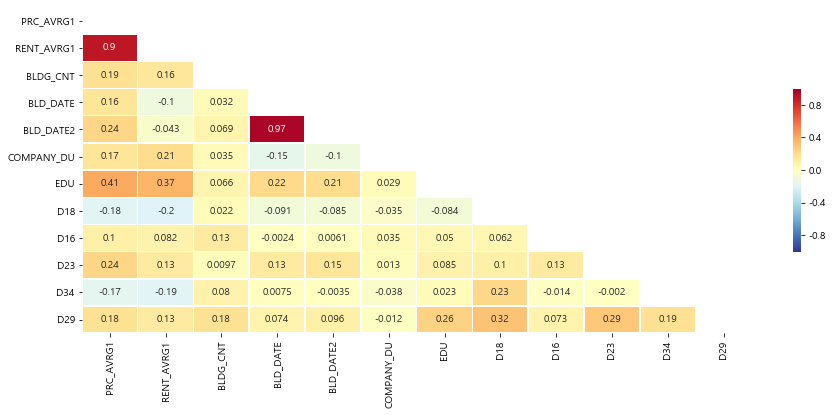

In [90]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(15,6) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()